# 서울시 범죄 현황 분석하기 (2020 기준)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [2]:
plt.rcParams['axes.unicode_minus']=False
rc('font', family ='gulim')

%matplotlib inline

get_ipython().run_line_magic('matplotlib','inline')

## 서울시 5대 범죄 발생현황 파악하기

In [3]:
# 데이터 읽기
crime = pd.read_csv('crime_in_seoul_2020.csv', thousands=',', encoding='euc-kr', header=[0,1])
crime

기간   자치구     합계          살인        강도      강간강제추행           절도         \
      기간   자치구     발생     검거   발생   검거   발생   검거     발생    검거     발생     검거   
0   2020    합계  92679  66548  141  126  138  132   5763  5458  38293  19705   
1   2020   종로구   3102   3343    9    7    7    9    192   855   1183    944   
2   2020    중구   3411   2323    2    2    5    6    186   128   1642    863   
3   2020   용산구   2969   2056    5    3    6    6    230   186   1111    534   
4   2020   성동구   2362   1774    5    5    3    3    115    98   1016    565   
5   2020   광진구   3601   2511    2    2    4    4    255   224   1664    874   
6   2020  동대문구   3401   2465   10    8    6    5    161   142   1440    713   
7   2020   중랑구   3726   2781   10    9    5    6    183   153   1506    889   
8   2020   성북구   2567   1947    4    4    3    2    142   121    988    580   
9   2020   강북구   2770   2259    9    8    5    4    159   132    780    490   
10  2020   도봉구   2179   1490    -    -    2    2     82    87    861    379   
11  2020   노원구   3743   2581    4    3    3    3    169   148   1404    646   
12  2020   은평구   3390   2531    4    4    4    3    171   145   1371    756   
13  2020  서대문구   2533   1706    3    3    2    1    159   149   1077    524   
14  2020   마포구   3688   2534    9    8    4    3    348   287   1483    679   
15  2020   양천구   3216   2086    5    5    3    3    109    90   1517    718   
16  2020   강서구   4415   3393   10    9    6    5    265   222   1689   1070   
17  2020   구로구   4175   2984    6    6    5    5    197   142   1763   1008   
18  2020   금천구   2598   1966    4    4    7    6    117    93    999    553   
19  2020  영등포구   5217   3371    7    4    6    5    315   252   2188    953   
20  2020   동작구   3200   2086    1    1    1    2    226   121   1341    592   
21  2020   관악구   5261   3858   12   12    3    3    403   351   2229   1137   
22  2020   서초구   4601   3052    5    5    6    4    396   303   2021    960   
23  2020   강남구   7356   5245    6    5   14   11    708   627   2951   1491   
24  2020   송파구   5410   3544    6    6   13   17    287   235   2429   1006   
25  2020   강동구   3788   2662    3    3   15   14    188   167   1640    781   

       폭력         
       발생     검거  
0   48344  41127  
1    1711   1528  
2    1576   1324  
3    1617   1327  
4    1223   1103  
5    1676   1407  
6    1784   1597  
7    2022   1724  
8    1430   1240  
9    1817   1625  
10   1234   1022  
11   2163   1781  
12   1840   1623  
13   1292   1029  
14   1844   1557  
15   1582   1270  
16   2445   2087  
17   2204   1823  
18   1471   1310  
19   2701   2157  
20   1631   1370  
21   2614   2355  
22   2173   1780  
23   3677   3111  
24   2675   2280  
25   1942   1697

### 결측치 확인

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   (기간, 기간)      26 non-null     int64 
 1   (자치구, 자치구)    26 non-null     object
 2   (합계, 발생)      26 non-null     int64 
 3   (합계, 검거)      26 non-null     int64 
 4   (살인, 발생)      26 non-null     object
 5   (살인, 검거)      26 non-null     object
 6   (강도, 발생)      26 non-null     int64 
 7   (강도, 검거)      26 non-null     int64 
 8   (강간강제추행, 발생)  26 non-null     int64 
 9   (강간강제추행, 검거)  26 non-null     int64 
 10  (절도, 발생)      26 non-null     int64 
 11  (절도, 검거)      26 non-null     int64 
 12  (폭력, 발생)      26 non-null     int64 
 13  (폭력, 검거)      26 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 3.0+ KB


In [5]:
crime.isnull().sum()

기간      기간     0
자치구     자치구    0
합계      발생     0
        검거     0
살인      발생     0
        검거     0
강도      발생     0
        검거     0
강간강제추행  발생     0
        검거     0
절도      발생     0
        검거     0
폭력      발생     0
        검거     0
dtype: int64

### 불필요한 컬럼 제거

In [6]:
# 기간은 2020 고정이므로 '기간' 제거
crime = crime.drop(crime.columns[0], axis=1)
crime

자치구     합계          살인        강도      강간강제추행           절도            폭력  \
     자치구     발생     검거   발생   검거   발생   검거     발생    검거     발생     검거     발생   
0     합계  92679  66548  141  126  138  132   5763  5458  38293  19705  48344   
1    종로구   3102   3343    9    7    7    9    192   855   1183    944   1711   
2     중구   3411   2323    2    2    5    6    186   128   1642    863   1576   
3    용산구   2969   2056    5    3    6    6    230   186   1111    534   1617   
4    성동구   2362   1774    5    5    3    3    115    98   1016    565   1223   
5    광진구   3601   2511    2    2    4    4    255   224   1664    874   1676   
6   동대문구   3401   2465   10    8    6    5    161   142   1440    713   1784   
7    중랑구   3726   2781   10    9    5    6    183   153   1506    889   2022   
8    성북구   2567   1947    4    4    3    2    142   121    988    580   1430   
9    강북구   2770   2259    9    8    5    4    159   132    780    490   1817   
10   도봉구   2179   1490    -    -    2    2     82    87    861    379   1234   
11   노원구   3743   2581    4    3    3    3    169   148   1404    646   2163   
12   은평구   3390   2531    4    4    4    3    171   145   1371    756   1840   
13  서대문구   2533   1706    3    3    2    1    159   149   1077    524   1292   
14   마포구   3688   2534    9    8    4    3    348   287   1483    679   1844   
15   양천구   3216   2086    5    5    3    3    109    90   1517    718   1582   
16   강서구   4415   3393   10    9    6    5    265   222   1689   1070   2445   
17   구로구   4175   2984    6    6    5    5    197   142   1763   1008   2204   
18   금천구   2598   1966    4    4    7    6    117    93    999    553   1471   
19  영등포구   5217   3371    7    4    6    5    315   252   2188    953   2701   
20   동작구   3200   2086    1    1    1    2    226   121   1341    592   1631   
21   관악구   5261   3858   12   12    3    3    403   351   2229   1137   2614   
22   서초구   4601   3052    5    5    6    4    396   303   2021    960   2173   
23   강남구   7356   5245    6    5   14   11    708   627   2951   1491   3677   
24   송파구   5410   3544    6    6   13   17    287   235   2429   1006   2675   
25   강동구   3788   2662    3    3   15   14    188   167   1640    781   1942   

           
       검거  
0   41127  
1    1528  
2    1324  
3    1327  
4    1103  
5    1407  
6    1597  
7    1724  
8    1240  
9    1625  
10   1022  
11   1781  
12   1623  
13   1029  
14   1557  
15   1270  
16   2087  
17   1823  
18   1310  
19   2157  
20   1370  
21   2355  
22   1780  
23   3111  
24   2280  
25   1697

### 컬럼 지정

In [7]:
crime['자치구']

,자치구
0,합계
1,종로구
2,중구
3,용산구
4,성동구
5,광진구
6,동대문구
7,중랑구
8,성북구
9,강북구


In [8]:
crime.columns.rename(['죄종','발생검거'], inplace=True)

In [9]:
crime

죄종     자치구     합계          살인        강도      강간강제추행           절도         \
발생검거   자치구     발생     검거   발생   검거   발생   검거     발생    검거     발생     검거   
0       합계  92679  66548  141  126  138  132   5763  5458  38293  19705   
1      종로구   3102   3343    9    7    7    9    192   855   1183    944   
2       중구   3411   2323    2    2    5    6    186   128   1642    863   
3      용산구   2969   2056    5    3    6    6    230   186   1111    534   
4      성동구   2362   1774    5    5    3    3    115    98   1016    565   
5      광진구   3601   2511    2    2    4    4    255   224   1664    874   
6     동대문구   3401   2465   10    8    6    5    161   142   1440    713   
7      중랑구   3726   2781   10    9    5    6    183   153   1506    889   
8      성북구   2567   1947    4    4    3    2    142   121    988    580   
9      강북구   2770   2259    9    8    5    4    159   132    780    490   
10     도봉구   2179   1490    -    -    2    2     82    87    861    379   
11     노원구   3743   2581    4    3    3    3    169   148   1404    646   
12     은평구   3390   2531    4    4    4    3    171   145   1371    756   
13    서대문구   2533   1706    3    3    2    1    159   149   1077    524   
14     마포구   3688   2534    9    8    4    3    348   287   1483    679   
15     양천구   3216   2086    5    5    3    3    109    90   1517    718   
16     강서구   4415   3393   10    9    6    5    265   222   1689   1070   
17     구로구   4175   2984    6    6    5    5    197   142   1763   1008   
18     금천구   2598   1966    4    4    7    6    117    93    999    553   
19    영등포구   5217   3371    7    4    6    5    315   252   2188    953   
20     동작구   3200   2086    1    1    1    2    226   121   1341    592   
21     관악구   5261   3858   12   12    3    3    403   351   2229   1137   
22     서초구   4601   3052    5    5    6    4    396   303   2021    960   
23     강남구   7356   5245    6    5   14   11    708   627   2951   1491   
24     송파구   5410   3544    6    6   13   17    287   235   2429   1006   
25     강동구   3788   2662    3    3   15   14    188   167   1640    781   

죄종       폭력         
발생검거     발생     검거  
0     48344  41127  
1      1711   1528  
2      1576   1324  
3      1617   1327  
4      1223   1103  
5      1676   1407  
6      1784   1597  
7      2022   1724  
8      1430   1240  
9      1817   1625  
10     1234   1022  
11     2163   1781  
12     1840   1623  
13     1292   1029  
14     1844   1557  
15     1582   1270  
16     2445   2087  
17     2204   1823  
18     1471   1310  
19     2701   2157  
20     1631   1370  
21     2614   2355  
22     2173   1780  
23     3677   3111  
24     2675   2280  
25     1942   1697

In [10]:
crime.columns.get_level_values(0)

Index(['자치구', '합계', '합계', '살인', '살인', '강도', '강도', '강간강제추행', '강간강제추행', '절도',
       '절도', '폭력', '폭력'],
      dtype='object', name='죄종')

In [11]:
crime.columns.get_level_values(1)

Index(['자치구', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생',
       '검거'],
      dtype='object', name='발생검거')

In [12]:
print(len(crime.columns.get_level_values(0)))
print()
print(len(crime.columns.get_level_values(1)))

13

13


In [13]:
tmp = [
    crime.columns.get_level_values(0)[n] + crime.columns.get_level_values(1)[n]
    for n in range(0, len(crime.columns.get_level_values(0)))
]
tmp

['자치구자치구',
 '합계발생',
 '합계검거',
 '살인발생',
 '살인검거',
 '강도발생',
 '강도검거',
 '강간강제추행발생',
 '강간강제추행검거',
 '절도발생',
 '절도검거',
 '폭력발생',
 '폭력검거']

In [14]:
crime.columns = tmp

In [15]:
crime.head(3)

,자치구자치구,합계발생,합계검거,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
0,합계,92679,66548,141,126,138,132,5763,5458,38293,19705,48344,41127
1,종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
2,중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324


In [16]:
crime.rename(columns={crime.columns[0] : '자치구'},inplace = True)

In [17]:
crime.head(3)

,자치구,합계발생,합계검거,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
0,합계,92679,66548,141,126,138,132,5763,5458,38293,19705,48344,41127
1,종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
2,중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324


In [18]:
crime = crime.set_index('자치구')

In [19]:
crime

,합계발생,합계검거,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
자치구,,,,,,,,,,,,
합계,92679,66548,141,126,138,132,5763,5458,38293,19705,48344,41127
종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324
용산구,2969,2056,5,3,6,6,230,186,1111,534,1617,1327
성동구,2362,1774,5,5,3,3,115,98,1016,565,1223,1103
광진구,3601,2511,2,2,4,4,255,224,1664,874,1676,1407
동대문구,3401,2465,10,8,6,5,161,142,1440,713,1784,1597
중랑구,3726,2781,10,9,5,6,183,153,1506,889,2022,1724
성북구,2567,1947,4,4,3,2,142,121,988,580,1430,1240


In [20]:
crime = crime.drop(crime.columns[0:2],axis=1)

In [21]:
crime.head(3)

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
자치구,,,,,,,,,,
합계,141,126,138,132,5763,5458,38293,19705,48344,41127
종로구,9,7,7,9,192,855,1183,944,1711,1528
중구,2,2,5,6,186,128,1642,863,1576,1324


In [22]:
crime = crime.drop('합계')

In [23]:
crime.head(3)

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
자치구,,,,,,,,,,
종로구,9,7,7,9,192,855,1183,944,1711,1528
중구,2,2,5,6,186,128,1642,863,1576,1324
용산구,5,3,6,6,230,186,1111,534,1617,1327


### 데이터 타입 변경

In [24]:
crime.dtypes

살인발생        object
살인검거        object
강도발생         int64
강도검거         int64
강간강제추행발생     int64
강간강제추행검거     int64
절도발생         int64
절도검거         int64
폭력발생         int64
폭력검거         int64
dtype: object

In [25]:
crime.iloc[:,0:2]

,살인발생,살인검거
자치구,,
종로구,9,7
중구,2,2
용산구,5,3
성동구,5,5
광진구,2,2
동대문구,10,8
중랑구,10,9
성북구,4,4
강북구,9,8


In [26]:
# '-' 제거
# 결측값이 없다고 했으므로 '-' >> 문자열 >> fillna X
# '-' 는 발생, 검거가 없는 것으로 보고 0으로 지정
crime.iloc[:,0:2] = crime.iloc[:,0:2].replace('-',0)

In [27]:
crime.iloc[:,0:2]

,살인발생,살인검거
자치구,,
종로구,9,7
중구,2,2
용산구,5,3
성동구,5,5
광진구,2,2
동대문구,10,8
중랑구,10,9
성북구,4,4
강북구,9,8


In [28]:
# object >> int
for i in crime.columns[0:2]:
    crime[i] = crime[i].astype('int')

In [29]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   살인발생      25 non-null     int32
 1   살인검거      25 non-null     int32
 2   강도발생      25 non-null     int64
 3   강도검거      25 non-null     int64
 4   강간강제추행발생  25 non-null     int64
 5   강간강제추행검거  25 non-null     int64
 6   절도발생      25 non-null     int64
 7   절도검거      25 non-null     int64
 8   폭력발생      25 non-null     int64
 9   폭력검거      25 non-null     int64
dtypes: int32(2), int64(8)
memory usage: 2.0+ KB


In [30]:
crime

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거
자치구,,,,,,,,,,
종로구,9,7,7,9,192,855,1183,944,1711,1528
중구,2,2,5,6,186,128,1642,863,1576,1324
용산구,5,3,6,6,230,186,1111,534,1617,1327
성동구,5,5,3,3,115,98,1016,565,1223,1103
광진구,2,2,4,4,255,224,1664,874,1676,1407
동대문구,10,8,6,5,161,142,1440,713,1784,1597
중랑구,10,9,5,6,183,153,1506,889,2022,1724
성북구,4,4,3,2,142,121,988,580,1430,1240
강북구,9,8,5,4,159,132,780,490,1817,1625


### Google Maps API

In [31]:
import googlemaps

In [32]:
gmaps_key = ""
gmaps = googlemaps.Client(key=gmaps_key)

In [33]:
gmaps.geocode('서울광진경찰서', language='ko')

[{'address_components': [{'long_name': '１６７',
    'short_name': '１６７',
    'types': ['premise']},
   {'long_name': '자양로',
    'short_name': '자양로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '구의동',
    'short_name': '구의동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '광진구',
    'short_name': '광진구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '143-201',
    'short_name': '143-201',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 광진구 구의동 자양로 167',
  'geometry': {'location': {'lat': 37.542873, 'lng': 127.083821},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5442219802915,
     'lng': 127.0851699802915},
    'southwest': {'lat': 3

In [34]:
gmaps.geocode('서울종로경찰서', language='ko')

[{'address_components': [{'long_name': '４６',
    'short_name': '４６',
    'types': ['premise']},
   {'long_name': '율곡로',
    'short_name': '율곡로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '종로구',
    'short_name': '종로구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '110-310',
    'short_name': '110-310',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 종로구 율곡로 46',
  'geometry': {'location': {'lat': 37.575548, 'lng': 126.9847471},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.57689698029151,
     'lng': 126.9860960802915},
    'southwest': {'lat': 37.57419901970851, 'lng': 126.9833981197085}}},
  'partial_match': True,
  'place_id': 'ChIJRVgVHsOifDURFhKFchVo22I',
  'p

In [35]:
gmaps.geocode('서울종로구경찰서', language='ko')

[{'address_components': [{'long_name': '종로구',
    'short_name': '종로구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']}],
  'formatted_address': '대한민국 서울특별시 종로구',
  'geometry': {'bounds': {'northeast': {'lat': 37.63633859999999,
     'lng': 127.0234666},
    'southwest': {'lat': 37.5654828, 'lng': 126.9436969}},
   'location': {'lat': 37.5729503, 'lng': 126.9793579},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 37.63633859999999, 'lng': 127.0234666},
    'southwest': {'lat': 37.5654828, 'lng': 126.9436969}}},
  'partial_match': True,
  'place_id': 'ChIJS5wn3S-9fDUR5ly4ei6px1A',
  'types': ['political', 'sublocality', 'sublocality_level_1']}]

In [36]:
gmaps.geocode('서울영등포경찰서', language='ko')

[{'address_components': [{'long_name': '６０８',
    'short_name': '６０８',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

In [37]:
tmp = gmaps.geocode("서울영등포경찰서", language='ko')

In [38]:
len(tmp)

1

In [39]:
tmp[0].get('geometry')

{'location': {'lat': 37.5260441, 'lng': 126.9008091},
 'location_type': 'ROOFTOP',
 'viewport': {'northeast': {'lat': 37.5273930802915, 'lng': 126.9021580802915},
  'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}}

In [40]:
# lat
tmp[0].get('geometry')['location']['lat']

37.5260441

In [41]:
# lng
tmp[0].get('geometry')['location']['lng']

126.9008091

In [42]:
tmp[0].get('formatted_address')

'대한민국 서울특별시 영등포구 국회대로 608'

In [43]:
# gu
tmp[0].get('formatted_address').split()[2]

'영등포구'

- 구별, lat. lng 컬럼

In [44]:
crime['관할서'] = np.nan
crime['구별'] = np.nan
crime['lat'] = np.nan
crime['lng'] = np.nan

In [45]:
crime.head(3)

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거,관할서,구별,lat,lng
자치구,,,,,,,,,,,,,,
종로구,9,7,7,9,192,855,1183,944,1711,1528,NaN,NaN,NaN,NaN
중구,2,2,5,6,186,128,1642,863,1576,1324,NaN,NaN,NaN,NaN
용산구,5,3,6,6,230,186,1111,534,1617,1327,NaN,NaN,NaN,NaN


In [46]:
for idx, rows in crime.iterrows():
    station_name = "서울"+str(idx)+"경찰서"
    tmp = gmaps.geocode(station_name,language='ko')
tmp

[{'address_components': [{'long_name': '강동구',
    'short_name': '강동구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']}],
  'formatted_address': '대한민국 서울특별시 강동구',
  'geometry': {'bounds': {'northeast': {'lat': 37.5817974, 'lng': 127.1835899},
    'southwest': {'lat': 37.5168014, 'lng': 127.109265}},
   'location': {'lat': 37.5301251, 'lng': 127.123762},
   'location_type': 'APPROXIMATE',
   'viewport': {'northeast': {'lat': 37.5817974, 'lng': 127.1835899},
    'southwest': {'lat': 37.5168014, 'lng': 127.109265}}},
  'partial_match': True,
  'place_id': 'ChIJOVvKgxWwfDURiyyT9sq7aX4',
  'types': ['political', 'sublocality', 'sublocality_level_1']}]

In [47]:
# 구를 제외하고 idx
idx.replace('구','')

'강동'

In [48]:
# iterrows()

count = 0

for idx, rows in crime.iterrows():
    station_name = "서울"+str(idx.replace('구',''))+"경찰서"
    if idx=='중구':
        station_name = "서울중부경찰서"
    tmp = gmaps.geocode(station_name,language='ko')
    
    # 구 정보 가져오기
    tmp[0].get('formatted_address')
    tmp_gu = tmp[0].get('formatted_address')
    
    # 위경도 좌표 가져오기
    lat = tmp[0].get('geometry')['location']['lat']
    lng = tmp[0].get('geometry')['location']['lng']
    
    # 만들어 놓은 열의 NaN 값 채우기
    crime.loc[idx, 'lat'] = lat
    crime.loc[idx, 'lng'] = lng
    crime.loc[idx, '구별'] = tmp_gu
    crime.loc[idx, '관할서'] = station_name

    # loc활용, idx(행), (구별, lat, lng) (열) 지정
    print(count)
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [49]:
crime

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거,관할서,구별,lat,lng
자치구,,,,,,,,,,,,,,
종로구,9,7,7,9,192,855,1183,944,1711,1528,서울종로경찰서,대한민국 서울특별시 종로구 율곡로 46,37.575548,126.984747
중구,2,2,5,6,186,128,1642,863,1576,1324,서울중부경찰서,대한민국 서울특별시 중구 수표로 27,37.563617,126.989652
용산구,5,3,6,6,230,186,1111,534,1617,1327,서울용산경찰서,대한민국 서울특별시 용산구 백범로 329,37.538710,126.965918
성동구,5,5,3,3,115,98,1016,565,1223,1103,서울성동경찰서,대한민국 서울특별시 성동구 행당동 왕십리광장로 9,37.561730,127.036422
광진구,2,2,4,4,255,224,1664,874,1676,1407,서울광진경찰서,대한민국 서울특별시 광진구 구의동 자양로 167,37.542873,127.083821
동대문구,10,8,6,5,161,142,1440,713,1784,1597,서울동대문경찰서,대한민국 서울특별시 동대문구 약령시로21길 29,37.585061,127.045768
중랑구,10,9,5,6,183,153,1506,889,2022,1724,서울중랑경찰서,대한민국 서울특별시 중랑구 묵2동 249-2,37.605643,127.076487
성북구,4,4,3,2,142,121,988,580,1430,1240,서울성북경찰서,대한민국 서울특별시 성북구 삼선동 보문로 170,37.589778,127.016589
강북구,9,8,5,4,159,132,780,490,1817,1625,서울강북경찰서,대한민국 서울특별시 강북구 오패산로 406,37.637304,127.027340


In [50]:
# 데이터 저장
crime.to_csv('crime_in_seoul_new.csv', sep=',', encoding='euc-kr')

## 구별 데이터로 정리

In [51]:
crime_station = pd.read_csv('crime_in_seoul_new.csv', index_col=0, encoding='CP949')
crime_station.head(3)

,살인발생,살인검거,강도발생,강도검거,강간강제추행발생,강간강제추행검거,절도발생,절도검거,폭력발생,폭력검거,관할서,구별,lat,lng
자치구,,,,,,,,,,,,,,
종로구,9,7,7,9,192,855,1183,944,1711,1528,서울종로경찰서,대한민국 서울특별시 종로구 율곡로 46,37.575548,126.984747
중구,2,2,5,6,186,128,1642,863,1576,1324,서울중부경찰서,대한민국 서울특별시 중구 수표로 27,37.563617,126.989652
용산구,5,3,6,6,230,186,1111,534,1617,1327,서울용산경찰서,대한민국 서울특별시 용산구 백범로 329,37.538710,126.965918


In [52]:
crime_gu = pd.pivot_table(crime_station,
                          index='자치구',
                          aggfunc=np.sum)
crime_gu

,lat,lng,강간강제추행검거,강간강제추행발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,,,
강남구,37.509435,127.066958,627,708,11,14,5,6,1491,2951,3111,3677
강동구,37.528511,127.126822,167,188,14,15,3,3,781,1640,1697,1942
강북구,37.637304,127.027340,132,159,4,5,8,9,490,780,1625,1817
강서구,37.551284,126.850038,222,265,5,6,9,10,1070,1689,2087,2445
관악구,37.474395,126.951349,351,403,3,3,12,12,1137,2229,2355,2614
광진구,37.542873,127.083821,224,255,4,4,2,2,874,1664,1407,1676
구로구,37.566535,126.977969,142,197,5,5,6,6,1008,1763,1823,2204
금천구,37.456872,126.897043,93,117,6,7,4,4,553,999,1310,1471
노원구,37.642139,127.071047,148,169,3,3,3,4,646,1404,1781,2163


In [53]:
del crime_gu['lat']
del crime_gu['lng']

In [54]:
crime_gu.head(3)

,강간강제추행검거,강간강제추행발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,
강남구,627,708,11,14,5,6,1491,2951,3111,3677
강동구,167,188,14,15,3,3,781,1640,1697,1942
강북구,132,159,4,5,8,9,490,780,1625,1817


In [55]:
target = ['강간강제추행검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

num = ['강간강제추행검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간강제추행발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values) * 100
crime_gu

,강간강제추행검거,강간강제추행발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,,,,
강남구,627,708,11,14,5,6,1491,2951,3111,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,167,188,14,15,3,3,781,1640,1697,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,132,159,4,5,8,9,490,780,1625,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,222,265,5,6,9,10,1070,1689,2087,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,351,403,3,3,12,12,1137,2229,2355,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,224,255,4,4,2,2,874,1664,1407,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,142,197,5,5,6,6,1008,1763,1823,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,93,117,6,7,4,4,553,999,1310,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,148,169,3,3,3,4,646,1404,1781,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [56]:
crime_gu_new = crime_gu.drop(num, axis=1)
crime_gu_new.head(3)

,강간강제추행발생,강도발생,살인발생,절도발생,폭력발생,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132


In [57]:
# 검거율이 100 이상인 값 100으로 지정
# 작년 사건을 올해 처리한 경우와 같이 이상치 발생 >> 100으로 맞춰준 것
condition = crime_gu_new[target]>100

In [58]:
crime_gu_new[condition] = 100
crime_gu_new

,강간강제추행발생,강도발생,살인발생,절도발생,폭력발생,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [59]:
# 또다른 방법
crime_gu_new[target].clip(lower=0, upper=100)

,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,
강남구,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,87.573964,100.000000,75.000000,46.011396,82.339344


In [60]:
crime_gu_new.isnull().sum()

강간강제추행발생     0
강도발생         0
살인발생         0
절도발생         0
폭력발생         0
강간강제추행검거율    0
강도검거율        0
살인검거율        1
절도검거율        0
폭력검거율        0
dtype: int64

In [61]:
# 도봉구 살인발생 :0 >> 살인검거율도 0
crime_gu_new = crime_gu_new.fillna(0)

In [62]:
crime_gu_new.isnull().sum()

강간강제추행발생     0
강도발생         0
살인발생         0
절도발생         0
폭력발생         0
강간강제추행검거율    0
강도검거율        0
살인검거율        0
절도검거율        0
폭력검거율        0
dtype: int64

In [63]:
# 컬럼 이름 바꾸기

crime_gu_new.rename(columns={'강간강제추행발생':'강간강제추행', '강도발생':'강도', '살인발생':'살인',
                              '절도발생':'절도', '폭력발생':'폭력'}, inplace=True)
crime_gu_new.head(3)

,강간강제추행,강도,살인,절도,폭력,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132


### 정규화

- 최댓값 : 1, 최솟값 : 0, min-max scale

In [64]:
col = ['강간강제추행','강도','살인','절도','폭력']

In [65]:
crime_norm = crime_gu_new[col] / crime_gu_new[col].max()

In [66]:
crime_norm

,강간강제추행,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,0.933333,0.500000,1.000000,1.000000
강동구,0.265537,1.000000,0.250000,0.555744,0.528148
강북구,0.224576,0.333333,0.750000,0.264317,0.494153
강서구,0.374294,0.400000,0.833333,0.572348,0.664944
관악구,0.569209,0.200000,1.000000,0.755337,0.710906
광진구,0.360169,0.266667,0.166667,0.563877,0.455806
구로구,0.278249,0.333333,0.500000,0.597425,0.599402
금천구,0.165254,0.466667,0.333333,0.338529,0.400054
노원구,0.238701,0.200000,0.333333,0.475771,0.588251


In [67]:
# 검거율 추가
col2 = ['강간강제추행검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_norm[col2] =crime_gu_new[col2]
crime_norm.head(3)

,강간강제추행,강도,살인,절도,폭력,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,1.000000,0.933333,0.50,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.265537,1.000000,0.25,0.555744,0.528148,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.224576,0.333333,0.75,0.264317,0.494153,83.018868,80.000000,88.888889,62.820513,89.433132


## 구별 범죄율과 cctv 현황 분석

### 구별 cctv 자료에서 인구수와 cctv수 추가

In [68]:
cctv_result = pd.read_csv('CCTV_result_2021.csv', index_col='구별', encoding='CP949')
cctv_result

,소계,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
구별,,,,,,,,,
종로구,1715,47.844828,153684,144275,9409,28064,93.877697,6.122303,18.260847
용산구,2611,165.615463,236518,222169,14349,39461,93.933231,6.066769,16.684142
성동구,3829,218.552413,291609,285073,6536,46896,97.758643,2.241357,16.081808
광진구,3211,506.994329,353110,340707,12403,52604,96.487497,3.512503,14.897341
동대문구,2628,175.760756,352592,337982,14610,62963,95.856401,4.143599,17.857183
중랑구,3737,281.716037,393600,389043,4557,72851,98.842226,1.157774,18.508892
성북구,4602,212.211669,442680,433150,9530,75719,97.847203,2.152797,17.104681
강북구,3090,563.090129,300824,297384,3440,64961,98.856474,1.143526,21.594354
도봉구,1930,226.013514,318100,316098,2002,65122,99.370638,0.629362,20.472179


In [69]:
cctv_result[['인구수','소계']]

,인구수,소계
구별,,
종로구,153684,1715
용산구,236518,2611
성동구,291609,3829
광진구,353110,3211
동대문구,352592,2628
중랑구,393600,3737
성북구,442680,4602
강북구,300824,3090
도봉구,318100,1930


In [70]:
crime_norm[['인구수','CCTV']] = cctv_result[['인구수','소계']]
crime_norm.head()

,강간강제추행,강도,살인,절도,폭력,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
자치구,,,,,,,,,,,,
강남구,1.000000,0.933333,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,537338.0,6871.0
강동구,0.265537,1.000000,0.250000,0.555744,0.528148,88.829787,93.333333,100.000000,47.621951,87.384140,465097.0,2809.0
강북구,0.224576,0.333333,0.750000,0.264317,0.494153,83.018868,80.000000,88.888889,62.820513,89.433132,300824.0,3090.0
강서구,0.374294,0.400000,0.833333,0.572348,0.664944,83.773585,83.333333,90.000000,63.351095,85.357873,578426.0,2744.0
관악구,0.569209,0.200000,1.000000,0.755337,0.710906,87.096774,100.000000,100.000000,51.009421,90.091813,500336.0,5149.0


In [71]:
# 정규화된 범죄 발생 건수 전체의 평균 >> 범죄 컬럼 대푯값

col = ['강간강제추행','강도','살인','절도','폭력']
np.mean(crime_norm[col], axis=1)

자치구
강남구     0.886667
강동구     0.519886
강북구     0.413276
강서구     0.568984
관악구     0.647090
광진구     0.362637
구로구     0.461682
금천구     0.340768
노원구     0.367211
도봉구     0.175304
동대문구    0.486777
동작구     0.273440
마포구     0.502446
서대문구    0.264849
서초구     0.530362
성동구     0.291199
성북구     0.291521
송파구     0.664528
양천구     0.342985
영등포구    0.580852
용산구     0.391554
은평구     0.361304
종로구     0.470812
중구      0.349549
중랑구     0.497076
dtype: float64

In [72]:
crime_norm['범죄'] = np.mean(crime_norm[col], axis=1)
crime_norm.head()

,강간강제추행,강도,살인,절도,폭력,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
자치구,,,,,,,,,,,,,
강남구,1.000000,0.933333,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,537338.0,6871.0,0.886667
강동구,0.265537,1.000000,0.250000,0.555744,0.528148,88.829787,93.333333,100.000000,47.621951,87.384140,465097.0,2809.0,0.519886
강북구,0.224576,0.333333,0.750000,0.264317,0.494153,83.018868,80.000000,88.888889,62.820513,89.433132,300824.0,3090.0,0.413276
강서구,0.374294,0.400000,0.833333,0.572348,0.664944,83.773585,83.333333,90.000000,63.351095,85.357873,578426.0,2744.0,0.568984
관악구,0.569209,0.200000,1.000000,0.755337,0.710906,87.096774,100.000000,100.000000,51.009421,90.091813,500336.0,5149.0,0.647090


In [73]:
# 검거율의 평균 >> 검거율 컬럼 대푯값

col = ['강간강제추행검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_norm['검거율'] = np.mean(crime_norm[col], axis=1)
crime_norm.head()

,강간강제추행,강도,살인,절도,폭력,강간강제추행검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,0.933333,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,537338.0,6871.0,0.886667,77.119269
강동구,0.265537,1.000000,0.250000,0.555744,0.528148,88.829787,93.333333,100.000000,47.621951,87.384140,465097.0,2809.0,0.519886,83.433842
강북구,0.224576,0.333333,0.750000,0.264317,0.494153,83.018868,80.000000,88.888889,62.820513,89.433132,300824.0,3090.0,0.413276,80.832280
강서구,0.374294,0.400000,0.833333,0.572348,0.664944,83.773585,83.333333,90.000000,63.351095,85.357873,578426.0,2744.0,0.568984,81.163177
관악구,0.569209,0.200000,1.000000,0.755337,0.710906,87.096774,100.000000,100.000000,51.009421,90.091813,500336.0,5149.0,0.647090,85.639602


### EDA 분석

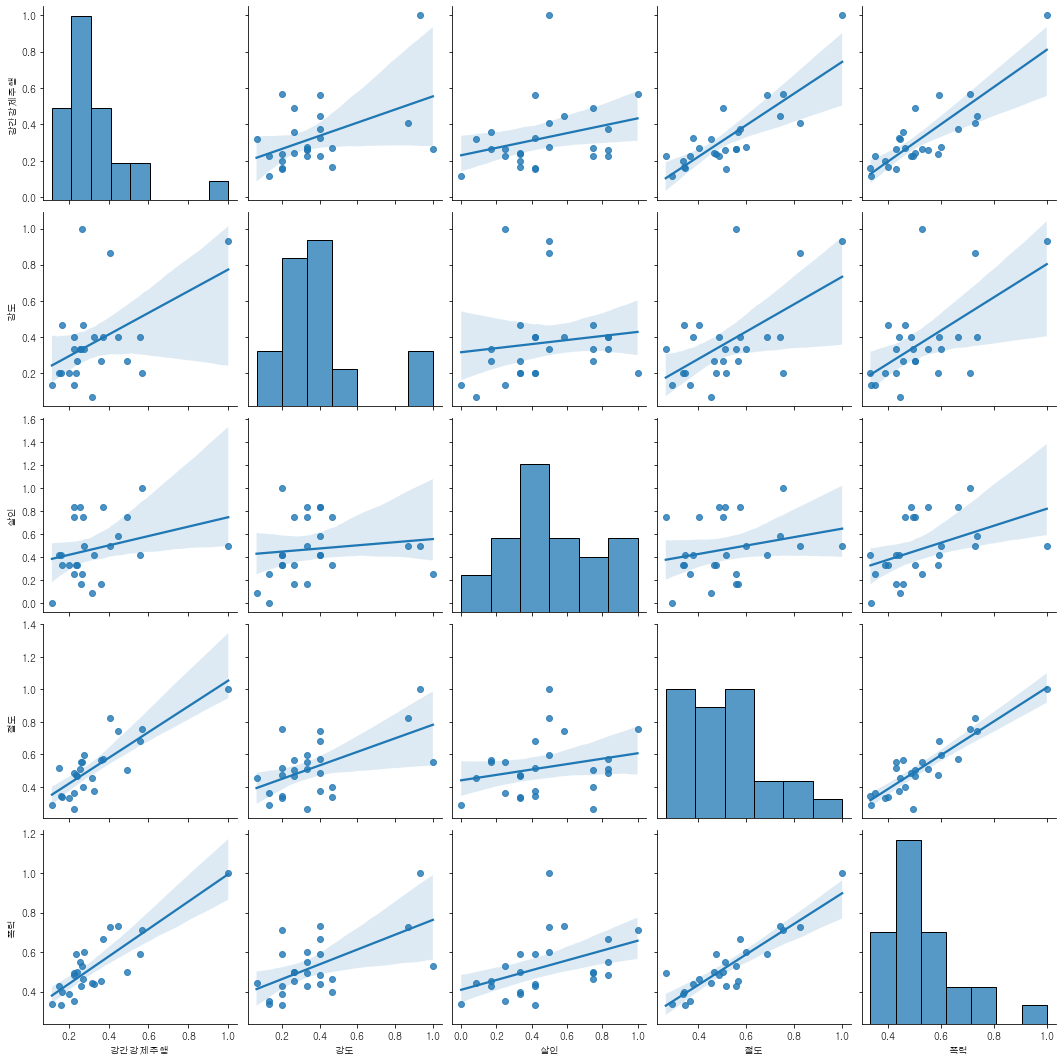

In [74]:
# pairplot() 강도, 살인 폭력에 대해서 상관관계가 있는지 확인

sns.pairplot(data=crime_norm, vars=['강간강제추행','강도','살인','절도','폭력'], kind='reg', height=3)

In [ ]:
# 결과 해석
# 해석 1. 폭력과 절도 상관관계가 가장 높음
# 해석 2. 살인과 강도 상관관계가 가장 낮음

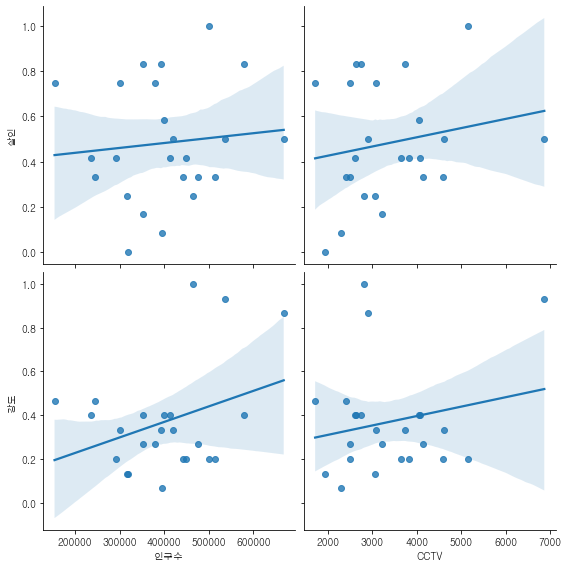

In [76]:
# '인구수' 'CCTV'와 '살인', '강도' 상관관계 확인

def drawGraph():
    sns.pairplot(data = crime_norm,
                x_vars = ['인구수','CCTV'],
                y_vars = ['살인','강도'],
                kind='reg',
                height=4)
    plt.show()
drawGraph()

In [ ]:
# 해석 1. 인구수가 증가한 것에 비해 살인이 많이 증가한다고 볼 수 없다.
# 해석 2. 인구수가 증가함에 따라 강도는 약간 증가
# 해석 3. CCTV가 증가함에 따라 강도, 살인 모두 약간 증가
# 강도, 살인이 많은 곳일 수록 CCTV많이 설치된 것?

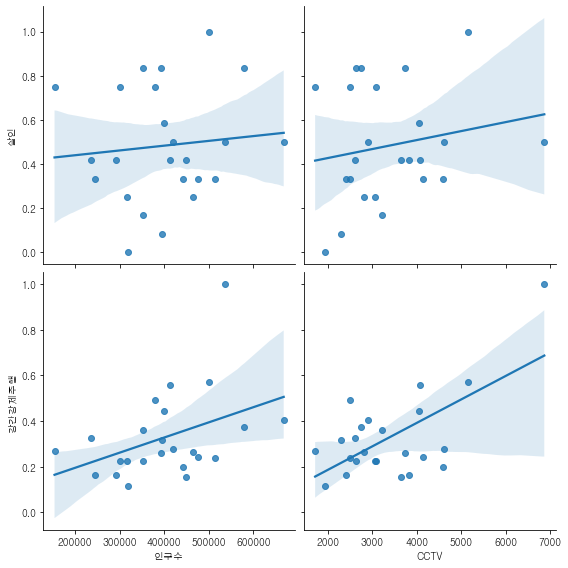

In [79]:
def drawGraph():
    sns.pairplot(data = crime_norm,
                x_vars = ['인구수','CCTV'],
                y_vars = ['살인','강간강제추행'],
                kind='reg',
                height=4)
    plt.show()
drawGraph()

In [ ]:
# 해석 1. 인구수가 증가할 수록 살인, 강간강제추행 수는 증가
# 해석 2. CCTV가 많아질 수록 살인, 강간강제추행 수 증가

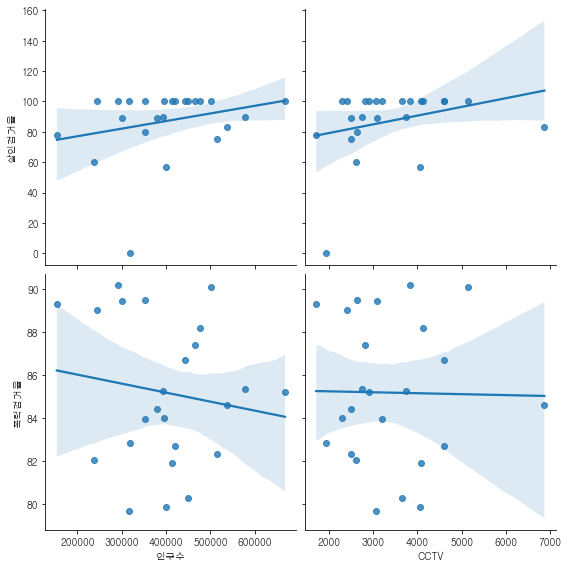

In [81]:
# '인구수', 'CCTV'와 '살인검거율', '폭력검거율' 상관관계 확인
def drawGraph():
    sns.pairplot(data = crime_norm,
                x_vars = ['인구수','CCTV'],
                y_vars = ['살인검거율','폭력검거율'],
                kind='reg',
                height=4)
    plt.show()
drawGraph()

In [ ]:
# 해석 1. 인구수가 증가할 수록 살인 검거율은 증가
# 해석 2. 인구수와 폭력검거율은 감소하는 경향
# 해석 3. CCTV와 살인 검거율은 해석하기 애매(100에 모여 있는 이유? 검거율을 100으로 제한했기 때문)
# 해석 4. CCTV가 증가할 수록 폭력검거율은 약간 하향세

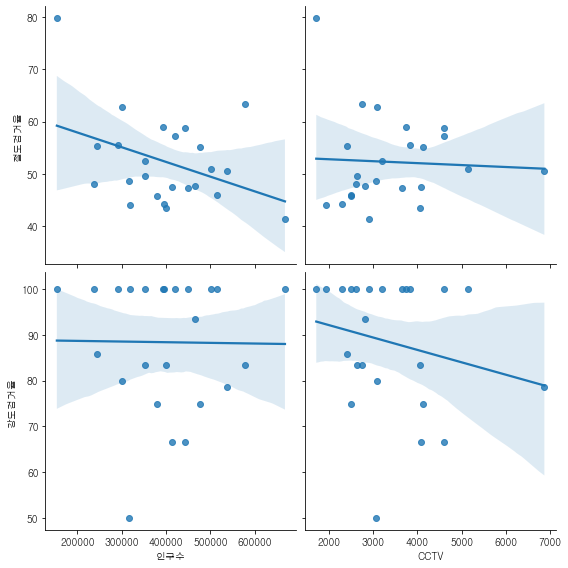

In [82]:
# '인구수', 'CCTV'와 '절도검거율', '강도검거율' 상관관계 확인
def drawGraph():
    sns.pairplot(data = crime_norm,
                x_vars = ['인구수','CCTV'],
                y_vars = ['절도검거율','강도검거율'],
                kind='reg',
                height=4)
    plt.show()
drawGraph()

In [ ]:
# 해석 1. CCTV가 증가할 수록 강도검거율과 절도검거율 모두 감소
# 해석 2. 인구수가 증가할 수록 절도검거율 감소, 강도검거율 다소 감소

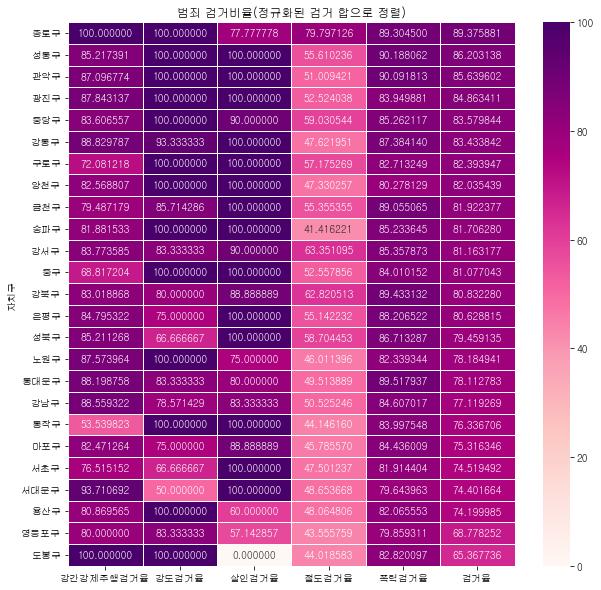

In [88]:
# 검거율 heatmap

# 대푯값을 설정한 '검거' 컬럼 기준으로 정렬

def drawGraph():
    # 데이터프레임 생성
    target_col = ['강간강제추행검거율', '강도검거율', '살인검거율','절도검거율','폭력검거율','검거율']
    crime_norm_sort = crime_norm.sort_values(by='검거율', ascending=False)  # 내림차순 정렬
    
    # 그래프 설정
    plt.figure(figsize=(10,10))
    sns.heatmap(data = crime_norm_sort[target_col],
               annot=True,
               fmt = 'f', #d : 정수, f: 실수
               linewidths = 0.5, # 간격 설정
               cmap = 'RdPu')
    plt.title('범죄 검거비율(정규화된 검거 합으로 정렬)')
    plt.show()
drawGraph()

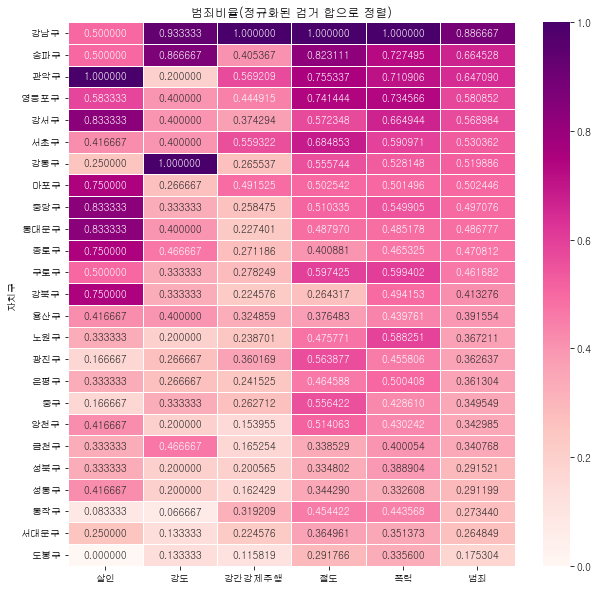

In [86]:
# 범죄 발생 건수 heatmap
# '범죄' 컬럼을 기준으로 정렬

def drawGraph():
    # 데이터프레임 생성
    target_col = ['살인','강도','강간강제추행','절도','폭력','범죄']
    crime_norm_sort = crime_norm.sort_values(by='범죄', ascending=False)  # 내림차순 정렬
    
    # 그래프 설정
    plt.figure(figsize=(10,10))
    sns.heatmap(data = crime_norm_sort[target_col],
               annot=True,
               fmt = 'f', #d : 정수, f: 실수
               linewidths = 0.5, # 간격 설정
               cmap = 'RdPu')
    plt.title('범죄비율(정규화된 검거 합으로 정렬)')
    plt.show()
drawGraph()

In [ ]:
# 강남구는 살인을 제외, 전부 1등
# 강남구는 범죄 발생 수는 많은데 검거율이 낮음
# 검거율은 '종로구'가 가장 높음
# 종로구는 범죄 발생 수에 비해 검거율이 높음
# 도봉구는 범죄 발생 수도 검거율도 가장 낮음

In [87]:
# 데이터 저장

crime_norm.to_csv('crime_in_Seoul_final.csv', sep=',', encoding='euc-kr')